In [3]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('SocMedAnalysis.xlsx')

In [5]:
df.isna().sum()

Month                       0
Date                        0
Profile Name                0
Channel                     0
Content Type                1
Likes                       1
Comments                    1
Labels                      0
Interactions                0
Insights - Reach            5
Insights - Impressions      5
Insights - Saves            5
Insights - Engagement       0
Insights - Video Views    394
dtype: int64

In [6]:
df[(df['Likes'] > 70) & (df['Likes'] < 120)]

,Month,Date,Profile Name,Channel,Content Type,Likes,Comments,Labels,Interactions,Insights - Reach,Insights - Impressions,Insights - Saves,Insights - Engagement,Insights - Video Views
9,Januari,2019-01-17 14:20:38,Orange_id,INSTAGRAM,carousel,93.0,1.0,ORGANIC,94,NaN,NaN,NaN,94,NaN
13,Januari,2019-01-23 15:53:17,Orange_id,INSTAGRAM,video,115.0,8.0,ORGANIC,123,2421.0,3290.0,4.0,127,699.0
35,Maret,2019-03-01 09:42:15,Orange_id,INSTAGRAM,video,118.0,1.0,ORGANIC,119,3739.0,5216.0,2.0,121,1361.0
66,Maret,2019-03-24 16:23:42,Orange_id,INSTAGRAM,video,90.0,2.0,ORGANIC,92,2249.0,3353.0,2.0,94,646.0
68,Maret,2019-03-25 18:51:25,Orange_id,INSTAGRAM,image,119.0,1.0,ORGANIC,120,3345.0,4590.0,0.0,120,NaN
72,Maret,2019-03-30 19:30:59,Orange_id,INSTAGRAM,video,112.0,0.0,ORGANIC,112,2291.0,3364.0,15.0,127,729.0
125,Januari,2019-01-12 18:00:01,Strawberry Spot,INSTAGRAM,image,89.0,0.0,ORGANIC,89,NaN,NaN,NaN,89,NaN


In [7]:
df[df['Insights - Reach'].isna()]

,Month,Date,Profile Name,Channel,Content Type,Likes,Comments,Labels,Interactions,Insights - Reach,Insights - Impressions,Insights - Saves,Insights - Engagement,Insights - Video Views
9,Januari,2019-01-17 14:20:38,Orange_id,INSTAGRAM,carousel,93.0,1.0,ORGANIC,94,NaN,NaN,NaN,94,NaN
71,Maret,2019-03-30 17:38:25,Orange_id,INSTAGRAM,video,23.0,2.0,ORGANIC,25,NaN,NaN,NaN,25,NaN
117,Januari,2019-01-11 12:01:59,Strawberry Spot,INSTAGRAM,image,3.0,0.0,ORGANIC,3,NaN,NaN,NaN,3,NaN
125,Januari,2019-01-12 18:00:01,Strawberry Spot,INSTAGRAM,image,89.0,0.0,ORGANIC,89,NaN,NaN,NaN,89,NaN
421,Maret,2019-03-26 11:18:08,Strawberry Spot,INSTAGRAM,video,14.0,0.0,ORGANIC,14,NaN,NaN,NaN,14,NaN


In [8]:
df['Likes'].fillna(0, inplace=True)

C:\Users\danny\AppData\Local\Temp\ipykernel_26688\1054178189.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Likes'].fillna(0, inplace=True)


In [9]:
columns_to_fill = ['Insights - Reach', 'Insights - Impressions', 'Insights - Saves']

# Define the range for filtering Interactions
interaction_range = 30

# Iterate over rows with NaN values in the specified columns
for col in columns_to_fill:
    df[col] = df.apply(
        lambda row: df[
            (df['Interactions'] >= row['Interactions'] - interaction_range) &
            (df['Interactions'] <= row['Interactions'] + interaction_range)
        ][col].mean() if pd.isna(row[col]) else row[col],
        axis=1
    )
df.isna().sum()

Month                       0
Date                        0
Profile Name                0
Channel                     0
Content Type                1
Likes                       0
Comments                    1
Labels                      0
Interactions                0
Insights - Reach            0
Insights - Impressions      0
Insights - Saves            0
Insights - Engagement       0
Insights - Video Views    394
dtype: int64

In [10]:
df[df['Content Type'].isna()]

,Month,Date,Profile Name,Channel,Content Type,Likes,Comments,Labels,Interactions,Insights - Reach,Insights - Impressions,Insights - Saves,Insights - Engagement,Insights - Video Views
40,Maret,2019-03-02 15:12:20,Orange_id,INSTAGRAM,NaN,0.0,NaN,ORGANIC,0,0.0,0.0,0.0,0,NaN


In [11]:
df.drop(index=40, inplace=True)

In [12]:
df.isna().sum()

Month                       0
Date                        0
Profile Name                0
Channel                     0
Content Type                0
Likes                       0
Comments                    0
Labels                      0
Interactions                0
Insights - Reach            0
Insights - Impressions      0
Insights - Saves            0
Insights - Engagement       0
Insights - Video Views    393
dtype: int64

In [13]:
# Menghitung median hanya untuk Content Type "video"
median_video_views = df[df["Content Type"] == "video"]["Insights - Video Views"].median()

# Mengisi nilai missing berdasarkan kondisi
df["Insights - Video Views"] = df.apply(
    lambda x: median_video_views if pd.isna(x["Insights - Video Views"]) and x["Content Type"] == "video" else (0 if pd.isna(x["Insights - Video Views"]) else x["Insights - Video Views"]),
    axis=1
)

In [14]:
dfVideo = df[df['Content Type'] == 'video']
dfCarousel = df[df['Content Type'] == 'carousel']
dfImage = df[df['Content Type'] == 'image']

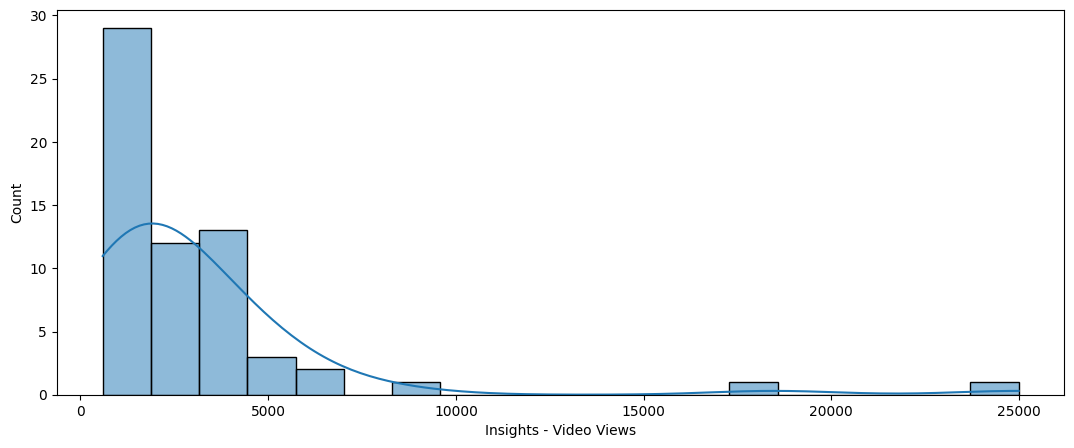

In [15]:
plt.figure(figsize=(13, 5))
# sns.histplot(data=dfVideo, x="Interactions", kde=True)
sns.histplot(data=dfVideo, x="Insights - Video Views", kde=True)
plt.show()

In [16]:
avg_video_impressions = df[df['Content Type'] == 'video']['Insights - Impressions'].mean().round(2)
avg_video_reach = df[df['Content Type'] == 'video']['Insights - Reach'].mean().round(2)
avg_video_engagement = df[df['Content Type'] == 'video']['Insights - Engagement'].mean().round(2)
vTotal = avg_video_impressions + avg_video_reach + avg_video_engagement
vir = avg_video_impressions/vTotal
vrr = avg_video_reach/vTotal
ver = avg_video_engagement/vTotal

In [17]:
avg_carousel_impressions = df[df['Content Type'] == 'carousel']['Insights - Impressions'].mean().round(2)
avg_carousel_reach = df[df['Content Type'] == 'carousel']['Insights - Reach'].mean().round(2)
avg_carousel_engagement = df[df['Content Type'] == 'carousel']['Insights - Engagement'].mean().round(2)
cTotal = avg_carousel_impressions + avg_carousel_reach + avg_carousel_engagement
cir = avg_carousel_impressions/cTotal
crr = avg_carousel_reach/cTotal
cer = avg_carousel_engagement/cTotal

In [18]:
avg_image_impressions = df[df['Content Type'] == 'image']['Insights - Impressions'].mean().round(2)
avg_image_reach = df[df['Content Type'] == 'image']['Insights - Reach'].mean().round(2)
avg_image_engagement = df[df['Content Type'] == 'image']['Insights - Engagement'].mean().round(2)
iTotal = avg_image_impressions + avg_image_reach + avg_image_engagement
iir = avg_image_impressions/iTotal
irr = avg_image_reach/iTotal
ier = avg_image_engagement/iTotal

In [19]:
print(f"""
Average Impressions for Videos: {avg_video_impressions}
Average Reach for Videos: {avg_video_reach}
Average Engagement for Videos: {avg_video_engagement}
Videos Ratio (Impressions:Reach:Engagement) : ({vir:.2f} : {vrr:.2f} : {ver:.2f})

Average Impressions for Carousels: {avg_carousel_impressions}
Average Reach for Carousels: {avg_carousel_reach}
Average Engagement for Carousels: {avg_carousel_engagement}
Carousels Ratio (Impressions:Reach:Engagement) : ({cir:.2f} : {crr:.2f} : {cer:.2f})

Average Impressions for Images: {avg_image_impressions}
Average Reach for Images: {avg_image_reach}
Average Engagement for Images: {avg_image_engagement}
Images Ratio (Impressions:Reach:Engagement) : ({iir:.2f} : {irr:.2f} : {ier:.2f})
      """)


Average Impressions for Videos: 11289.97
Average Reach for Videos: 8253.81
Average Engagement for Videos: 425.89
Videos Ratio (Impressions:Reach:Engagement) : (0.57 : 0.41 : 0.02)

Average Impressions for Carousels: 12535.96
Average Reach for Carousels: 6603.62
Average Engagement for Carousels: 595.11
Carousels Ratio (Impressions:Reach:Engagement) : (0.64 : 0.33 : 0.03)

Average Impressions for Images: 24580.42
Average Reach for Images: 18473.72
Average Engagement for Images: 1309.3
Images Ratio (Impressions:Reach:Engagement) : (0.55 : 0.42 : 0.03)
      


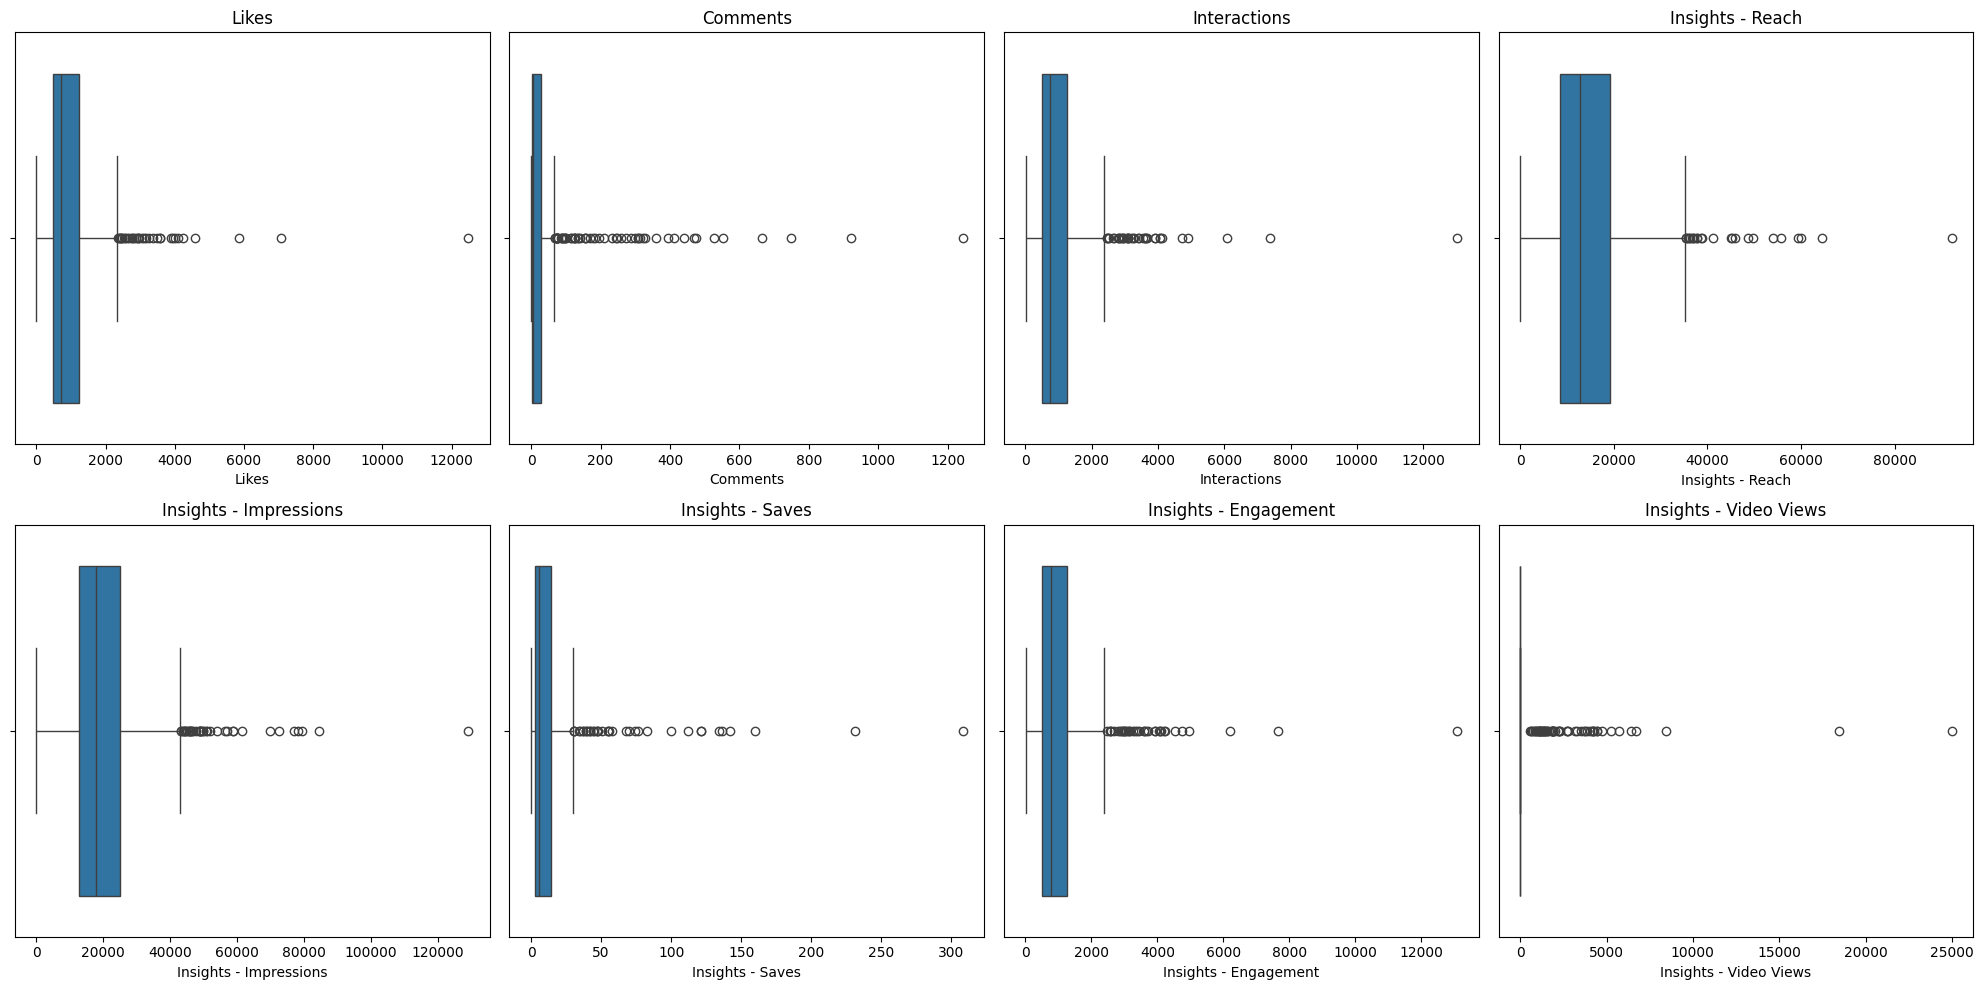

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

columns = ["Likes", "Comments", "Interactions", "Insights - Reach", "Insights - Impressions", "Insights - Saves", "Insights - Engagement", "Insights - Video Views"]

for i, col in enumerate(columns):
    # Create boxplot
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)
    
    # # Annotate median
    # median_value = df[col].median()  # Calculate median
    # axes[i].text(
    #     x=0.5,  # Position text in the middle of the boxplot (x-axis)
    #     y=median_value,  # Position text at the median value (y-axis)
    #     s=f'Median: {median_value:.2f}',  # Annotation text
    #     color='red',
    #     fontsize=9,
    #     ha='center',  # Horizontal alignment
    #     va='center',  # Vertical alignment
    #     bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')  # Optional: Add background box
    # )
plt.tight_layout()
plt.show()

In [26]:
df[(df['Insights - Saves'] > 200) & (df['Insights - Impressions'] > 100000)]
df[(df['Insights - Impressions'] > 100000)]

,Month,Date,Profile Name,Channel,Content Type,Likes,Comments,Labels,Interactions,Insights - Reach,Insights - Impressions,Insights - Saves,Insights - Engagement,Insights - Video Views
217,Februari,2019-02-04 10:50:29,Strawberry Spot,INSTAGRAM,image,12474.0,553.0,PROMOTED,13027,92165.0,129107.0,55.0,13081,0.0


In [21]:
# df.to_excel('SocMedAnalysisCleaned.xlsx', index=False)
df.to_csv('SocMedAnalysisCleaned.csv')